# <div style="text-align: left; background-color:#45C7EF; font-family:Arial; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">KHÁM PHÁ DỮ LIỆU TRÊN TẬP DỮ DIỆU SmallDS</div>

📝 Import các thư viện cần thiết

In [653]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from pathlib import Path  
import seaborn as sns
import matplotlib.pyplot as plt

📝 Đọc file SmallDS.csv và in ra 5 dòng đầu tiên của bộ dữ liệu

In [654]:
df_SmallDS = pd.read_csv('./raw_data/SmallDS.csv')
table = tabulate(df_SmallDS, headers='keys', tablefmt='fancy_grid')
print(table)

╒═════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════════════════╤══════════════════════════════════════════╤════════════╤════════════════╤═════════════════╤════════════╤═══════════════╤══════════╤═══════════════════╤════════════════════╤════════════════╤════════════╤═══════════╕
│     │ DiaChi                                                                                                                                                               │ GiaBan         │ DuAn                                     │ DienTich   │ TinhTrangBDS   │ Gia/m2          │ PhongNgu   │ PhongVeSinh   │   SoTang │ TinhTrangGiayTo   │ TinhTrangNoiThat   │ HuongBanCong   │ HuongCua   │ DacDiem   │
╞═════╪══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪══════════════

📝 Số dòng và số cột của bộ dữ liệu

In [655]:
ds_rows, ds_cols = df_SmallDS.shape
print(f'Số hàng: {ds_rows}\nSố cột: {ds_cols}')

Số hàng: 933
Số cột: 14


📝 Hiển thị kiểu dữ liệu và số lượng của từng cột trong bộ dữ liệu

In [656]:
df_SmallDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933 entries, 0 to 932
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DiaChi            933 non-null    object 
 1   GiaBan            933 non-null    object 
 2   DuAn              742 non-null    object 
 3   DienTich          933 non-null    object 
 4   TinhTrangBDS      933 non-null    object 
 5   Gia/m2            933 non-null    object 
 6   PhongNgu          933 non-null    object 
 7   PhongVeSinh       806 non-null    object 
 8   SoTang            242 non-null    float64
 9   TinhTrangGiayTo   282 non-null    object 
 10  TinhTrangNoiThat  201 non-null    object 
 11  HuongBanCong      123 non-null    object 
 12  HuongCua          191 non-null    object 
 13  DacDiem           33 non-null     object 
dtypes: float64(1), object(13)
memory usage: 102.2+ KB


📝 Xem số lượng giá trị duy nhất trong mỗi cột

In [657]:
print(df_SmallDS.nunique())

DiaChi              444
GiaBan              331
DuAn                241
DienTich            169
TinhTrangBDS          2
Gia/m2              754
PhongNgu              6
PhongVeSinh           6
SoTang               30
TinhTrangGiayTo       3
TinhTrangNoiThat      4
HuongBanCong          8
HuongCua              8
DacDiem               1
dtype: int64


📝 Kiểm tra xem có dòng nào bị lặp không

In [658]:
#Tính tổng dòng lặp
num_duplicated_rows = df_SmallDS.duplicated().sum()
is_duplicated = (num_duplicated_rows != 0)
print('So dong lap la {}'.format(num_duplicated_rows))
print(is_duplicated)

So dong lap la 0
False


📝 Đếm số lượng giá trị thiếu (NaN) trong cột 'Gia/m2' của DataFrame 'df_SmallDS'

In [659]:
num_NaN = df_SmallDS['Gia/m2'].isnull().sum()
num_NaN

0

📝 Đếm số lượng giá trị thiếu (NaN) trong cột 'PhongVeSinh' của DataFrame 'df_SmallDS'

In [660]:
#Đếm số lượng giá trị thiếu (NaN) trong cột 'PhongVeSinh' của DataFrame 'df_SmallDS'
num_NaN = df_SmallDS['PhongVeSinh'].isnull().sum()
num_NaN

127

📝 Biểu đồ ma trận

<AxesSubplot:>

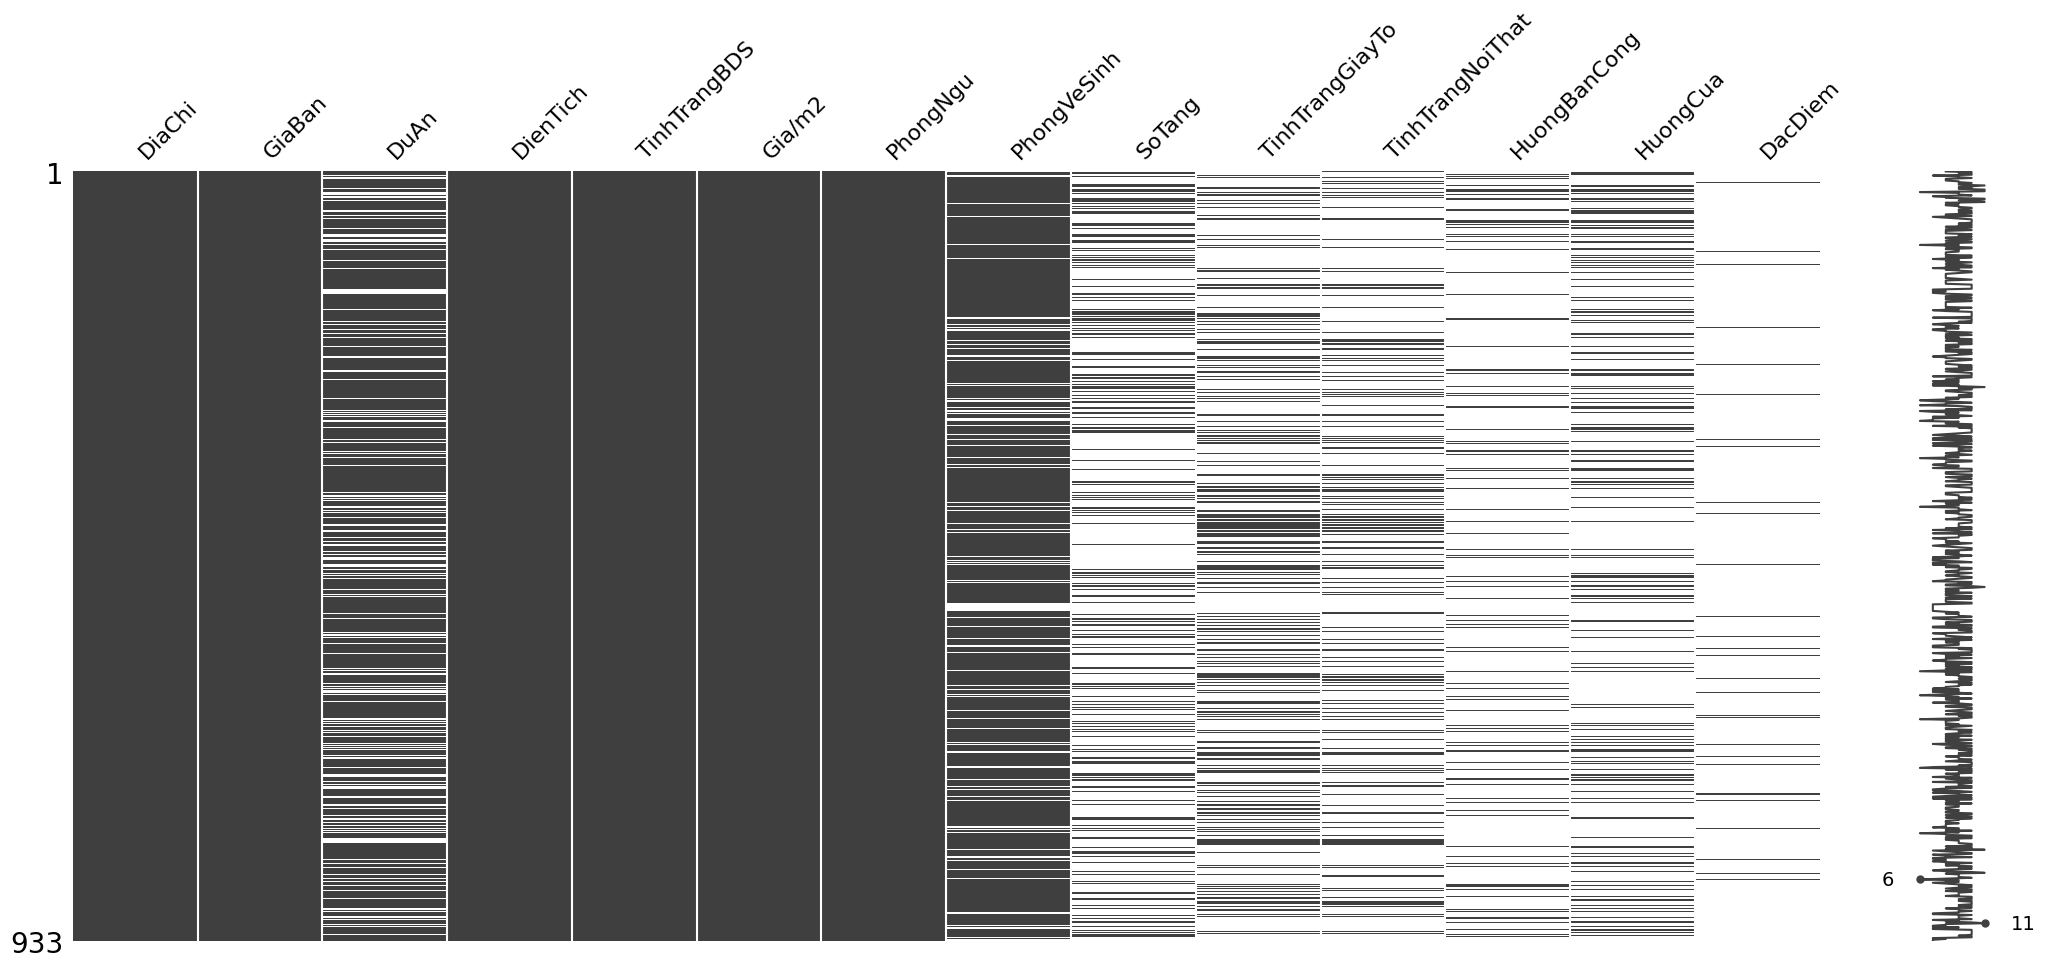

In [661]:
import missingno as msno
msno.matrix(df_SmallDS)

📝 Đếm số lượng giá trị thiếu (NaN) trong cột 'Gia/m2' của DataFrame 'df_SmallDS'

In [662]:
missing_ratio = df_SmallDS.isnull().sum()
missing_ratio = missing_ratio / ds_rows
missing_ratio

DiaChi              0.000000
GiaBan              0.000000
DuAn                0.204716
DienTich            0.000000
TinhTrangBDS        0.000000
Gia/m2              0.000000
PhongNgu            0.000000
PhongVeSinh         0.136120
SoTang              0.740622
TinhTrangGiayTo     0.697749
TinhTrangNoiThat    0.784566
HuongBanCong        0.868167
HuongCua            0.795284
DacDiem             0.964630
dtype: float64

📝 Tỉ lệ giá trị thiếu trong mỗi cột

In [663]:
missing_ratio = df_SmallDS.isnull().sum() / len(df_SmallDS) * 100
missing_ratio_df = pd.DataFrame(missing_ratio, columns=['Missing Ratio'])
styled_missing_ratio = missing_ratio_df.style\
    .apply(lambda x: ['background: #89C6E9; color: black' if v > 0 else '' for v in x],
           axis=0)
# Hiển thị tỷ lệ giá trị thiếu với màu và chữ đen
print("Tỷ lệ giá trị thiếu trong mỗi cột:")
styled_missing_ratio


Tỷ lệ giá trị thiếu trong mỗi cột:


,Missing Ratio
DiaChi,0.000000
GiaBan,0.000000
DuAn,20.471597
DienTich,0.000000
TinhTrangBDS,0.000000
Gia/m2,0.000000
PhongNgu,0.000000
PhongVeSinh,13.612004
SoTang,74.062165
TinhTrangGiayTo,69.774920


📝 Thống kê mô tả của từng cột

In [664]:
description = df_SmallDS.describe()
styled_description = description.style\
    .set_properties(**{'background-color': '#89C6E9', 'color': 'black', 'border-color': '#8b8c8c'})
styled_description


,SoTang
count,242.000000
mean,11.421488
std,6.689004
min,1.000000
25%,7.000000
50%,10.000000
75%,15.750000
max,33.000000


In [665]:
# Chọn các cột không phải số
cate_col_df = df_SmallDS.select_dtypes(exclude=['float64', 'float32', 'int64', 'int32'])
# Thống kê mô tả của các cột không phải số
description = cate_col_df.describe()
styled_description = description.style\
    .set_properties(**{'background-color':'#89C6E9', 'color': 'black', 'border-color': '#8b8c8c'})
styled_description

,DiaChi,GiaBan,DuAn,DienTich,TinhTrangBDS,Gia/m2,PhongNgu,PhongVeSinh,TinhTrangGiayTo,TinhTrangNoiThat,HuongBanCong,HuongCua,DacDiem
count,933,933,742,933,933,933,933,806,282,201,123,191,33
unique,444,331,241,169,2,754,6,6,3,4,8,8,1
top,"số 88, N1, Phường Sơn Kỳ, Quận Tân Phú, Tp Hồ Chí Minh","2,5 tỷ",Celadon City,68 m²,Đã bàn giao,40 triệu/m²,2 phòng,2 phòng,Đã có sổ,Nội thất đầy đủ,Đông Nam,Tây Bắc,Căn góc
freq,30,19,34,45,712,9,677,571,225,88,50,41,33


In [666]:
def missing_ratio(df_SmallDS):
    return (df_SmallDS.isna().mean() * 100).round(1)
def num_values(df_SmallDS):
    return df_SmallDS.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100).round(1))
df_SmallDS.agg([missing_ratio, num_values, value_ratios])

,DiaChi,GiaBan,DuAn,DienTich,TinhTrangBDS,Gia/m2,PhongNgu,PhongVeSinh,SoTang,TinhTrangGiayTo,TinhTrangNoiThat,HuongBanCong,HuongCua,DacDiem
missing_ratio,0.0,0.0,20.5,0.0,0.0,0.0,0.0,13.6,74.1,69.8,78.5,86.8,79.5,96.5
num_values,444,331,241,169,2,754,6,6,30,3,4,8,8,1
value_ratios,"{'số 88, N1, Phường Sơn Kỳ, Quận Tân Phú, Tp H...","{'2,5 tỷ': 2.0, '2 tỷ': 2.0, '1,9 tỷ': 2.0, '2...","{'Celadon City': 4.6, 'Vinhomes Grand Park': 3...","{'68 m²': 4.8, '75 m²': 4.0, '70 m²': 3.5, '50...","{'Đã bàn giao': 76.3, 'Chưa bàn giao': 23.7}","{'40 triệu/m²': 1.0, '25 triệu/m²': 0.9, '50 t...","{'2 phòng': 72.6, '3 phòng': 13.4, '1 phòng': ...","{'2 phòng': 70.8, '1 phòng': 25.6, '3 phòng': ...","{8.0: 10.7, 10.0: 7.0, 12.0: 7.0, 6.0: 6.6, 9....","{'Đã có sổ': 79.8, 'Đang chờ sổ': 15.2, 'Giấy ...","{'Nội thất đầy đủ': 43.8, 'Nhà trống': 34.8, '...","{'Đông Nam': 40.7, 'Đông Bắc': 16.3, 'Đông': 1...","{'Tây Bắc': 21.5, 'Đông Nam': 15.2, 'Tây': 12....",{'Căn góc': 100.0}


In [667]:
#xử lý cho cột 'Gia/m2'.
list_val1=df_SmallDS['Gia/m2'].values.tolist()
list_unit1=[]
for i in list_val1:
    list_unit1.append(i.split(" ",1)[1])
    
#Xử lý cho cột 'DienTich'
list_val2=df_SmallDS['DienTich'].values.tolist()
list_unit2=[]
for i in list_val2:
    list_unit2.append(i.split(" ",1)[1])  
    
#Xử lý cho cột 'GiaBan'
list_val3=df_SmallDS['GiaBan'].values.tolist()
list_unit3=[]
for i in list_val3:
    list_unit3.append(i.split(" ",1)[1])
print(f"Các đơn vị của cột 'Gia/m2':", set(list_unit1))
print(f"Các đơn vị của cột 'DienTich':", set(list_unit2))
print(f"Các đơn vị của cột 'GiaBan':", set(list_unit3))

Các đơn vị của cột 'Gia/m2': {'tỷ/m²', 'triệu/m²', 'đ/m²'}
Các đơn vị của cột 'DienTich': {'m²'}
Các đơn vị của cột 'GiaBan': {'tỷ', 'triệu'}


In [668]:
df_SmallDS["DienTich"].unique()

array(['58 m²', '162.75 m²', '56 m²', '66.6 m²', '162 m²', '80 m²',
       '110.8 m²', '45 m²', '57 m²', '85 m²', '54 m²', '55 m²', '81.5 m²',
       '63.4 m²', '59 m²', '46.9 m²', '76 m²', '75 m²', '67 m²', '51 m²',
       '68 m²', '69 m²', '35 m²', '106 m²', '60 m²', '52 m²', '88 m²',
       '78 m²', '66 m²', '53 m²', '119.5 m²', '70 m²', '105 m²', '100 m²',
       '71 m²', '124 m²', '73 m²', '82 m²', '83 m²', '65 m²', '81.9 m²',
       '68.68 m²', '72 m²', '63 m²', '34 m²', '93 m²', '118 m²', '77 m²',
       '79 m²', '61 m²', '71.84 m²', '86 m²', '28 m²', '49 m²', '78.9 m²',
       '50 m²', '74 m²', '121 m²', '81 m²', '30 m²', '84 m²', '51.3 m²',
       '91 m²', '92.6 m²', '10 m²', '114 m²', '62 m²', '69.5 m²',
       '46.7 m²', '135 m²', '113 m²', '97 m²', '112.3 m²', '235.47 m²',
       '40 m²', '142 m²', '48 m²', '95 m²', '64 m²', '133.5 m²',
       '67.37 m²', '37.5 m²', '101 m²', '71.1 m²', '33.8 m²', '117 m²',
       '136 m²', '63.8 m²', '192 m²', '195.6 m²', '42 m²', '83.3 m²

In [669]:
df_SmallDS["DienTich"] =df_SmallDS["DienTich"].str.replace('m²','')
df_SmallDS["DienTich"] = pd.to_numeric(df_SmallDS["DienTich"],errors='coerce')
df_SmallDS.rename(columns={'DienTich':'DienTich(m2)'},inplace=True)
df_SmallDS['DienTich(m2)']

0       58.00
1      162.75
2       56.00
3       66.60
4      162.00
        ...  
928    320.00
929     68.00
930     46.00
931     72.00
932     50.00
Name: DienTich(m2), Length: 933, dtype: float64

In [670]:
df_SmallDS["GiaBan"].unique()

array(['1,7 tỷ', '8 tỷ', '1,67 tỷ', '2,5 tỷ', '6,5 tỷ', '2,55 tỷ',
       '3,98651494 tỷ', '1,58 tỷ', '500 triệu', '3,4 tỷ', '1,9 tỷ',
       '1,8 tỷ', '3,05 tỷ', '3,2 tỷ', '2,549552028 tỷ', '2,16 tỷ',
       '2,099694 tỷ', '1,36 tỷ', '2,1 tỷ', '2,85 tỷ', '1,72 tỷ', '2,9 tỷ',
       '1,32 tỷ', '1,49 tỷ', '1,5 tỷ', '2,4 tỷ', '4,95 tỷ', '1,75 tỷ',
       '1,899 tỷ', '2,6 tỷ', '1,28 tỷ', '1,1 tỷ', '6,6 tỷ', '1,62 tỷ',
       '1,37 tỷ', '3,8 tỷ', '3 tỷ', '4,3 tỷ', '3,6 tỷ', '2,05 tỷ',
       '1,96 tỷ', '2,2 tỷ', '1,85 tỷ', '7 tỷ', '1,05 tỷ', '3,25 tỷ',
       '2,3 tỷ', '2,15 tỷ', '1,55 tỷ', '3,79 tỷ', '3,45 tỷ', '1,45 tỷ',
       '1,39 tỷ', '4,65 tỷ', '3,85 tỷ', '2,39 tỷ', '1,68 tỷ', '650 triệu',
       '6,35 tỷ', '1,93 tỷ', '3,254 tỷ', '2,8 tỷ', '1,51 tỷ', '1,6 tỷ',
       '1,95 tỷ', '250 triệu', '3,5 tỷ', '2,035 tỷ', '1,47 tỷ', '1,41 tỷ',
       '4,5 tỷ', '5,1 tỷ', '1,65 tỷ', '1,46 tỷ', '2,95 tỷ', '1,86 tỷ',
       '888,89 triệu', '1,48 tỷ', '1,4 tỷ', '450 triệu', '2,7 tỷ',
       '1,43 

In [671]:
df_SmallDS['GiaBan'] = df_SmallDS['GiaBan'].str.replace(',', '.')  # Xóa dấu phẩy
for index, row in df_SmallDS.iterrows():
    gia_ban = row['GiaBan']
    if 'tỷ' in gia_ban:  # Kiểm tra nếu giá trị có đơn vị là tỷ
        gia_ban = gia_ban.replace(' tỷ', '')  # Xóa ký tự ' tỷ'
    elif 'triệu' in gia_ban:  # Kiểm tra nếu giá trị có đơn vị là triệu
        gia_ban = gia_ban.replace(' triệu', '')  # Xóa ký tự ' triệu'
        gia_ban = float(gia_ban) / 1000  # Chia cho 1000 để chuyển đổi từ triệu sang tỷ
    elif 'đ' in gia_ban:  # Kiểm tra nếu giá trị có đơn vị là đồng
        gia_ban = gia_ban.replace(' đ', '')  # Xóa ký tự ' đ'
        gia_ban = float(gia_ban) / 1000000000  # Chia cho 1 tỷ để chuyển đổi từ đồng sang tỷ
    df_SmallDS.at[index, 'GiaBan'] = gia_ban

# Chuyển đổi cột GiaBan sang kiểu số
df_SmallDS['GiaBan'] = pd.to_numeric(df_SmallDS['GiaBan'])
print(df_SmallDS['GiaBan'])


0       1.700
1       8.000
2       1.670
3       2.500
4       6.500
        ...  
928    65.000
929     1.688
930     1.850
931     2.400
932     1.820
Name: GiaBan, Length: 933, dtype: float64


In [672]:
df_SmallDS["PhongNgu"].unique()

array(['2 phòng', '4 phòng', '3 phòng', '1 phòng', '10 phòng', '5 phòng'],
      dtype=object)

In [673]:
df_SmallDS["PhongNgu"] = df_SmallDS["PhongNgu"].str.replace('phòng', '')
df_SmallDS["PhongNgu"] = df_SmallDS["PhongNgu"].astype('float64')
df_SmallDS['PhongNgu']

0      2.0
1      4.0
2      2.0
3      2.0
4      3.0
      ... 
928    5.0
929    2.0
930    2.0
931    2.0
932    2.0
Name: PhongNgu, Length: 933, dtype: float64

In [674]:
df_SmallDS["PhongVeSinh"].unique()

array([nan, '3 phòng', '1 phòng', '2 phòng', '6 phòng', '4 phòng',
       '5 phòng'], dtype=object)

In [675]:
df_SmallDS["PhongVeSinh"] = df_SmallDS["PhongVeSinh"].str.replace('phòng', '')
df_SmallDS["PhongVeSinh"] = df_SmallDS["PhongVeSinh"].astype('float64')
df_SmallDS['PhongVeSinh']

0      NaN
1      3.0
2      1.0
3      2.0
4      3.0
      ... 
928    NaN
929    2.0
930    NaN
931    NaN
932    NaN
Name: PhongVeSinh, Length: 933, dtype: float64

In [676]:
df_SmallDS["Gia/m2"].unique()

array(['29,31 triệu/m²', '49,16 triệu/m²', '29,82 triệu/m²',
       '37,54 triệu/m²', '40,12 triệu/m²', '31,88 triệu/m²',
       '35,98 triệu/m²', '35,11 triệu/m²', '8,77 triệu/m²', '40 triệu/m²',
       '35,19 triệu/m²', '33,33 triệu/m²', '55,45 triệu/m²',
       '39,26 triệu/m²', '40,21 triệu/m²', '36,61 triệu/m²',
       '44,77 triệu/m²', '17,89 triệu/m²', '36,21 triệu/m²',
       '38 triệu/m²', '25,67 triệu/m²', '56,86 triệu/m²',
       '19,41 triệu/m²', '21,59 triệu/m²', '23,75 triệu/m²',
       '68,57 triệu/m²', '46,7 triệu/m²', '31,25 triệu/m²', '25 triệu/m²',
       '32,19 triệu/m²', '34,67 triệu/m²', '18,82 triệu/m²',
       '21,15 triệu/m²', '75 triệu/m²', '20,26 triệu/m²',
       '36,36 triệu/m²', '28,93 triệu/m²', '26,86 triệu/m²',
       '55,07 triệu/m²', '56,6 triệu/m²', '57,33 triệu/m²',
       '30,13 triệu/m²', '30,15 triệu/m²', '33,79 triệu/m²',
       '27,5 triệu/m²', '41,43 triệu/m²', '27,21 triệu/m²',
       '66,67 triệu/m²', '19,09 triệu/m²', '48 triệu/m²',
       

In [677]:
def convert_price_per_square(price):
    if 'triệu/m²' in price:
        price = price.replace('triệu/m²', '').replace(',', '.')
        return float(price)
    if 'tỷ/m²' in price:
        price = price.replace('tỷ/m²', '').replace(',', '.')
        return float(price) * 1000
    if 'đ/m²' in price:
        price = price.replace('đ/m²', '').replace(',', '.')
        return float(price) / 1000
    return None
df_SmallDS['Gia/m2'] = df_SmallDS['Gia/m2'].apply(convert_price_per_square)

In [678]:
(df_SmallDS['Gia/m2']).head(115)

0      29.31
1      49.16
2      29.82
3      37.54
4      40.12
       ...  
110    37.07
111    37.68
112    22.92
113    31.13
114    21.47
Name: Gia/m2, Length: 115, dtype: float64

In [679]:
print(f"Dữ liệu sau khi chuyển đổi")
df_SmallDS.dtypes

Dữ liệu sau khi chuyển đổi


DiaChi               object
GiaBan              float64
DuAn                 object
DienTich(m2)        float64
TinhTrangBDS         object
Gia/m2              float64
PhongNgu            float64
PhongVeSinh         float64
SoTang              float64
TinhTrangGiayTo      object
TinhTrangNoiThat     object
HuongBanCong         object
HuongCua             object
DacDiem              object
dtype: object

In [680]:
df = df_SmallDS.copy()
addr = []
for i in range(len(df['DiaChi'])):
    a = df.DiaChi[i].split(',')
    temp = []
    for j in a:
        if 'Huyện' in j:
            temp.append(j)
        if 'Quận' in j:
            temp.append(j)
        if 'Thủ Đức' in j:
            temp.append(j)
    
    addr.append(temp[-1])
df_SmallDS['Quan'] = addr
df_SmallDS.head(2)

,DiaChi,GiaBan,DuAn,DienTich(m2),TinhTrangBDS,Gia/m2,PhongNgu,PhongVeSinh,SoTang,TinhTrangGiayTo,TinhTrangNoiThat,HuongBanCong,HuongCua,DacDiem,Quan
0,"D7, Phường Phú Hữu (Quận 9 cũ), Thành phố Thủ ...",1.7,Ricca,58.00,Đã bàn giao,29.31,2.0,NaN,NaN,NaN,Nội thất đầy đủ,NaN,NaN,NaN,Thành phố Thủ Đức
1,"Nguyễn Hữu Thọ, Phường Tân Hưng, Quận 7, Tp Hồ...",8.0,Sunrise City,162.75,Chưa bàn giao,49.16,4.0,3.0,8.0,NaN,NaN,NaN,Tây,NaN,Quận 7


In [681]:
df_SmallDS

,DiaChi,GiaBan,DuAn,DienTich(m2),TinhTrangBDS,Gia/m2,PhongNgu,PhongVeSinh,SoTang,TinhTrangGiayTo,TinhTrangNoiThat,HuongBanCong,HuongCua,DacDiem,Quan
0,"D7, Phường Phú Hữu (Quận 9 cũ), Thành phố Thủ ...",1.700,Ricca,58.00,Đã bàn giao,29.310000,2.0,NaN,NaN,NaN,Nội thất đầy đủ,NaN,NaN,NaN,Thành phố Thủ Đức
1,"Nguyễn Hữu Thọ, Phường Tân Hưng, Quận 7, Tp Hồ...",8.000,Sunrise City,162.75,Chưa bàn giao,49.160000,4.0,3.0,8.0,NaN,NaN,NaN,Tây,NaN,Quận 7
2,"D7, Phường Phú Hữu (Quận 9 cũ), Thành phố Thủ ...",1.670,Ricca,56.00,Đã bàn giao,29.820000,2.0,1.0,NaN,Đã có sổ,NaN,NaN,NaN,NaN,Thành phố Thủ Đức
3,"Số 4, Đào Trí, Phường Phú Thuận, Quận 7, Tp Hồ...",2.500,Saigon Riverside Complex Q7,66.60,Đã bàn giao,37.540000,2.0,2.0,30.0,NaN,NaN,NaN,Bắc,NaN,Quận 7
4,"Nguyễn Hữu Thọ, Phường Tân Hưng, Quận 7, Tp Hồ...",6.500,Sunrise City,162.00,Đã bàn giao,40.120000,3.0,3.0,NaN,NaN,NaN,Đông,Tây,NaN,Quận 7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,"Bình An, Phường An Khánh (Quận 2 cũ), Thành ph...",65.000,The River Thủ Thiêm,320.00,Chưa bàn giao,0.203125,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thành phố Thủ Đức
929,"Tân Chánh Hiệp, Phường Tân Chánh Hiệp, Quận 12...",1.688,Hưng Ngân Garden,68.00,Đã bàn giao,24.820000,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Quận 12
930,"Lý Chiêu Hoàng, Phường 10, Quận 6, Tp Hồ Chí Minh",1.850,The Western Capital,46.00,Đã bàn giao,40.220000,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Quận 6
931,"Lý Chiêu Hoàng, Phường 10, Quận 6, Tp Hồ Chí Minh",2.400,The Western Capital,72.00,Đã bàn giao,33.330000,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Quận 6


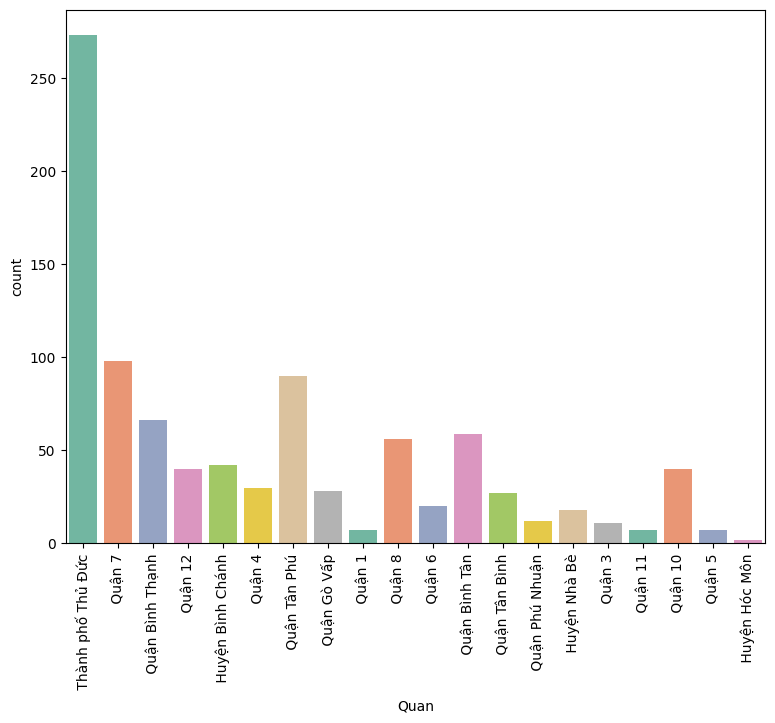

In [682]:
plt.figure(figsize=(15, 20))
plt.subplot(3, 2, 1)
ax1 = sns.countplot(x=df_SmallDS['Quan'], palette="Set2")
ax1.set_xticklabels(df_SmallDS['Quan'].unique(), rotation=90)
plt.tight_layout()
plt.show()

In [683]:
numeric_df = df_SmallDS.copy()
numeric_df = numeric_df[['GiaBan', 'DienTich(m2)', 'Gia/m2', 'PhongNgu', 'PhongVeSinh','SoTang']]
columns = list(numeric_df.columns)
titles = ['missing_ratio', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max']
arrays = numeric_df.to_numpy()
num_col_dict = {}
for i in range(len(columns)):
    column = columns[i]
    missing_ratio = (sum(pd.isnull(numeric_df[column])) / numeric_df.shape[0]) * 100
    min_val = np.nanmin(arrays[:, i]).round(1)
    lower_quartile = np.nanpercentile(arrays[:, i], 25).round(3)
    median = np.nanpercentile(arrays[:, i], 50).round(3)
    upper_quartile = np.nanpercentile(arrays[:, i], 75).round(3)
    max_val = np.nanmax(arrays[:, i]).round(3)

    num_col_dict[column] = [missing_ratio, min_val, lower_quartile, median, upper_quartile, max_val]

num_col_dict['titles'] = titles
numeric_info_df = pd.DataFrame(num_col_dict).set_index('titles')
numeric_info_df.style.set_properties(**{'background-color': '#89C6E9', 'color': 'black', 'border-color': '#8b8c8c'})


,GiaBan,DienTich(m2),Gia/m2,PhongNgu,PhongVeSinh,SoTang
titles,,,,,,
missing_ratio,0.000000,0.000000,0.000000,0.000000,13.612004,74.062165
min,0.200000,1.000000,0.000000,1.000000,1.000000,1.000000
lower_quartile,1.670000,60.000000,25.000000,2.000000,1.000000,7.000000
median,2.270000,70.000000,34.910000,2.000000,2.000000,10.000000
upper_quartile,3.250000,80.000000,44.340000,2.000000,2.000000,15.750000
max,65.000000,398.000000,1580.000000,10.000000,6.000000,33.000000


In [684]:
filepath = Path('./clean_data/clean_SmallDS.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_SmallDS.to_csv(filepath, encoding='utf-8-sig')

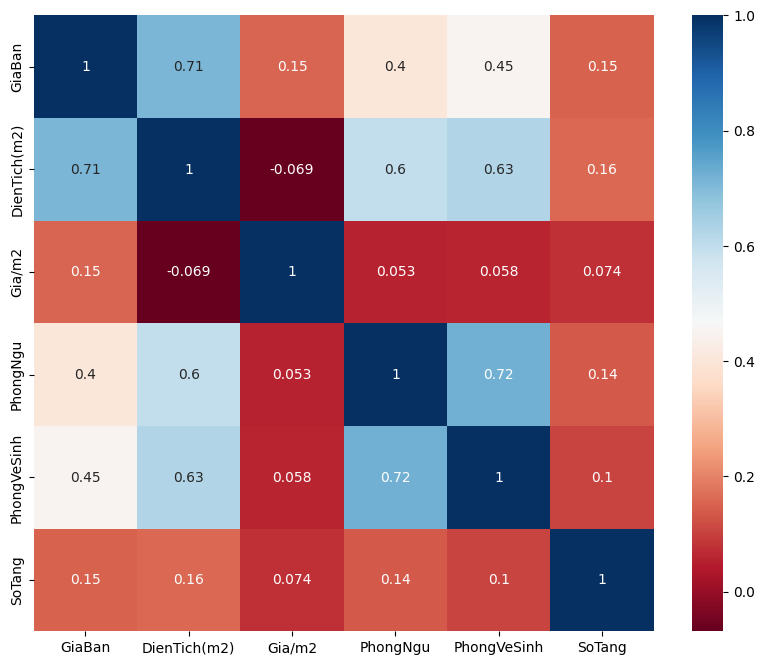

In [685]:
correlation_matrix = df_SmallDS.copy()
correlation_matrix = correlation_matrix.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu')  

plt.show()  
